In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# model = ["bidir_dag_lstm", "gs_lstm"]
# dataset = ["validate", "test", "train"]

# for m in model:
#     for d in dataset:
#         data_path = "./" + m + "_result/" + d + "/result.json"

#         with open(data_path) as f:
#             json_file = json.load(f)

#         confusion_matrix = np.asarray(json_file["confusion_matrix"])
#         confusion_matrix_normalized = np.asarray(json_file["confusion_matrix_normalized"])
#         accuracy = json_file["accuracy"]
#         tsne = json_file["tsne"]
#         answer = json_file["answer"]
        
#         ##
#         print(m + "_" + d, "accuracy:", accuracy)
        
        
#         ## SET UP CONFUSION MATRRIX
#         classes = [0, 1, 2, 3, 4, 5]
#         cmap=plt.cm.Blues
#         title_abs = m + "_" + d + "_abolute"
#         title_norm = m + "_" + d + "_normalized"

#         fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 24))
#         im1 = ax1.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
#         ax1.figure.colorbar(im1, ax=ax1)
#         # We want to show all ticks...
#         ax1.set(xticks=np.arange(confusion_matrix.shape[1]),
#                yticks=np.arange(confusion_matrix.shape[0]),
#                xticklabels=classes, yticklabels=classes,
#                title=title_abs,
#                ylabel='True label',
#                xlabel='Predicted label')

#         # Rotate the tick labels and set their alignment.
#         plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#         # Loop over data dimensions and create text annotations.
#         fmt = '.2f' 
#         thresh = confusion_matrix.max() / 2.
#         for i in range(confusion_matrix.shape[0]):
#             for j in range(confusion_matrix.shape[1]):
#                 ax1.text(j, i, format(confusion_matrix[i, j], fmt), horizontalalignment="center", verticalalignment="center",
#                         color="white" if confusion_matrix[i, j] > thresh else "black")

#         im2 = ax2.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=cmap)
#         ax2.figure.colorbar(im2, ax=ax2)
#         # We want to show all ticks...
#         ax2.set(xticks=np.arange(confusion_matrix_normalized.shape[1]),
#                yticks=np.arange(confusion_matrix_normalized.shape[0]),
#                xticklabels=classes, yticklabels=classes,
#                title=title_norm,
#                ylabel='True label',
#                xlabel='Predicted label')

#         # Rotate the tick labels and set their alignment.
#         plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#         # Loop over data dimensions and create text annotations.
#         # fmt = 'd'
#         thresh = confusion_matrix_normalized.max() / 2.
#         for i in range(confusion_matrix_normalized.shape[0]):
#             for j in range(confusion_matrix_normalized.shape[1]):
#                 ax2.text(j, i, confusion_matrix_normalized[i, j], horizontalalignment="center", verticalalignment="center",
#                 color="white" if confusion_matrix_normalized[i, j] > thresh else "black")
        
#         palette = np.array(sns.color_palette("hls", 5))
#         ax3.scatter([t[0] for t in tsne], [t[1] for t in tsne], c=palette[np.asarray(answer)])
#         ax3.set_title('TSNE for ' + d)
        
#         fig.tight_layout()
#         plt.show()        

bidir_dag_lstm_test accuracy: [0.0]


TypeError: 'int' object is not iterable

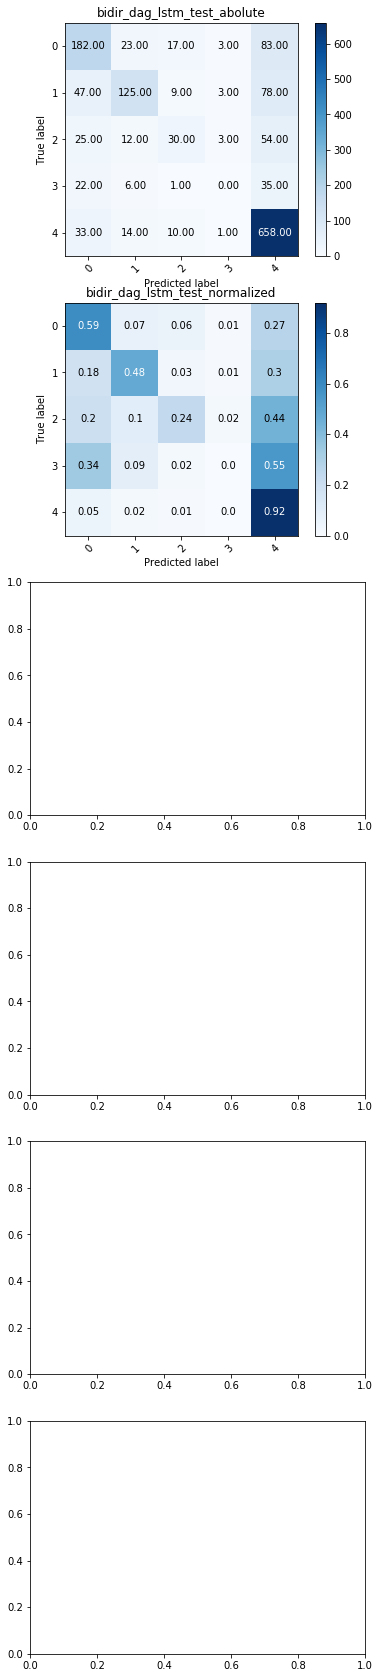

In [3]:
m = "bidir_dag_lstm"
d = "test"

data_path = "./" + m + "_result/" + d + "/result.json"

with open(data_path) as f:
    json_file = json.load(f)

confusion_matrix = np.asarray(json_file["confusion_matrix"])
confusion_matrix_normalized = np.asarray(json_file["confusion_matrix_normalized"])
accuracy = json_file["accuracy"]
tsne = json_file["tsne"]
answer = json_file["answer"]
        
print(m + "_" + d, "accuracy:", accuracy)
        
        
## SET UP CONFUSION MATRRIX
classes = [0, 1, 2, 3, 4, 5]
bin_classes = [0, 1]
cmap=plt.cm.Blues
title_abs = m + "_" + d + "_abolute"
title_norm = m + "_" + d + "_normalized"

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(6, 30))
im1 = ax1.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
ax1.figure.colorbar(im1, ax=ax1)
# We want to show all ticks...
ax1.set(xticks=np.arange(confusion_matrix.shape[1]), yticks=np.arange(confusion_matrix.shape[0]),
        xticklabels=classes, yticklabels=classes, title=title_abs, ylabel='True label', xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f' 
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax1.text(j, i, format(confusion_matrix[i, j], fmt), horizontalalignment="center", verticalalignment="center",
                color="white" if confusion_matrix[i, j] > thresh else "black")

# Initiate normalize version
im2 = ax2.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=cmap)
ax2.figure.colorbar(im2, ax=ax2)
# We want to show all ticks...
ax2.set(xticks=np.arange(confusion_matrix_normalized.shape[1]), yticks=np.arange(confusion_matrix_normalized.shape[0]),
        xticklabels=classes, yticklabels=classes, title=title_norm, ylabel='True label', xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# fmt = 'd'
thresh = confusion_matrix_normalized.max() / 2.
for i in range(confusion_matrix_normalized.shape[0]):
    for j in range(confusion_matrix_normalized.shape[1]):
        ax2.text(j, i, confusion_matrix_normalized[i, j], horizontalalignment="center", verticalalignment="center",
                color="white" if confusion_matrix_normalized[i, j] > thresh else "black")

# ------------------------------------------------------        
confusion_matrix_binary = confusion_matrix
for i in len(confusion_matrix):
    for j in len(confusion_matrix[0]):
        if confusion_matrix[i, j] < 4:
            confusion_matrix_binary[i, j] = 0
        else:
            confusion_matrix_binary[i, j] = 1
        
im3 = ax3.imshow(confusion_matrix_binary, interpolation='nearest', cmap=cmap)
ax3.figure.colorbar(im3, ax=ax3)
# We want to show all ticks...
ax1.set(xticks=np.arange(confusion_matrix_binary.shape[1]), yticks=np.arange(confusion_matrix_binary.shape[0]),
        xticklabels=classes, yticklabels=classes, title=title_abs, ylabel='True label', xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f' 
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix_binary.shape[0]):
    for j in range(confusion_matrix_binary.shape[1]):
        ax1.text(j, i, format(confusion_matrix_binary[i, j], fmt), horizontalalignment="center", verticalalignment="center",
                color="white" if confusion_matrix_binary[i, j] > thresh else "black")
        
        
        
confusion_matrix_binary_normalized = np.round(confusion_matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], 2)

# Initiate normalize version
im2 = ax2.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=cmap)
ax2.figure.colorbar(im2, ax=ax2)
# We want to show all ticks...
ax2.set(xticks=np.arange(confusion_matrix_normalized.shape[1]), yticks=np.arange(confusion_matrix_normalized.shape[0]),
        xticklabels=classes, yticklabels=classes, title=title_norm, ylabel='True label', xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# fmt = 'd'
thresh = confusion_matrix_normalized.max() / 2.
for i in range(confusion_matrix_normalized.shape[0]):
    for j in range(confusion_matrix_normalized.shape[1]):
        ax2.text(j, i, confusion_matrix_normalized[i, j], horizontalalignment="center", verticalalignment="center",
                color="white" if confusion_matrix_normalized[i, j] > thresh else "black")
        
palette = np.array(sns.color_palette("hls", 5))
ax3.scatter([t[0] for t in tsne], [t[1] for t in tsne], c=palette[np.asarray(answer)])
ax3.set_title('TSNE for ' + d)
        
fig.tight_layout()
plt.show()        